In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import cvxpy as cp

from decentr_geom_median import *
import ciropt as co

In [2]:
# random seed
np.random.seed(108)

# data generation
problem_spec = {}
problem_spec['n_node'] = 6
problem_spec['vector_size'] = 10
print(problem_spec)
problem_data = data_generation(problem_spec)
network_data = graph_generation_nodes6()

problem_data['rho'] = 0.01

problem_spec['sc_eps'] = 1

# PG-EXTRA hyperparameters
problem_data['alpha'] = 2.5
problem_data['itr_num'] = 1000

{'n_node': 6, 'vector_size': 10}


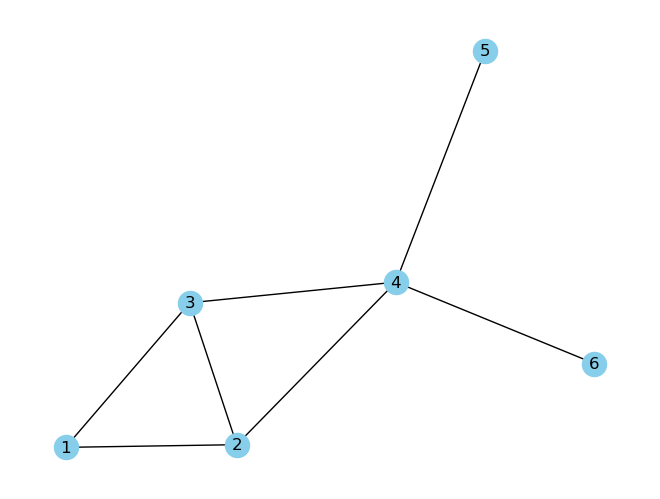

In [3]:
nx.draw(network_data["G"], node_color='skyblue', with_labels=True)
# plt.savefig("plots/graph_n6.pdf")

In [4]:
f_star, x_opt_star = cvx_geom_median(problem_spec, problem_data)
print(f"{f_star=}, {np.linalg.norm(x_opt_star)=}")

f_star=971.7294003135602, np.linalg.norm(x_opt_star)=128.01259731173963


In [6]:
b = problem_data['b']
 
vector_size = problem_spec['vector_size']
n_node = problem_spec['n_node']
eps = problem_spec['sc_eps']
prox_operators = []
fi_operators = []

for jj in range(n_node):
    bj = b[jj*vector_size : (jj+1)*vector_size]
    if jj in [3, 4]:
        prox_operators += [lambda z, alpha, bj=bj:  cvx_prox_fj_geom_mean_sc(z, alpha, bj, vector_size, eps=eps)]
        fi_operators += [lambda x_kj, bj=bj: np.linalg.norm((x_kj - bj), ord=2) + eps*np.linalg.norm(x_kj, ord=2)**2]
    else:
        prox_operators += [lambda z, alpha, bj=bj:  prox_fj_geom_mean(z, alpha, bj)]
        fi_operators += [lambda x_kj, bj=bj: np.linalg.norm((x_kj - bj), ord=2)]

    z = np.random.randn(vector_size)
    x1 = prox_fj_geom_mean(z, 1, bj)
    x2 = cvx_prox_fj_geom_mean(z, 1, bj, vector_size)
    assert np.linalg.norm(x1 - x2) / np.linalg.norm(x1) < 1e-5

In [15]:
params={"R":18, "Inductance":10, "Capacitance":1, "h":1.0541046971920436}
dadmm_c_err_opt_star, dadmm_c_err_opt_reldiff, dadmm_c_const_vio, dadmm_c_f_reldiff = co.dadmm("cir_dadmm_c", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params=params, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.04067043310768159, err_opt_reldiff[-1]=0.9115668258627952
ii=200, f_reldiff[-1]=9.868503748879525e-08, err_opt_reldiff[-1]=0.0002461744051920482
ii=400, f_reldiff[-1]=7.037773098079137e-09, err_opt_reldiff[-1]=0.00010963517283942682
ii=600, f_reldiff[-1]=3.783581558564494e-09, err_opt_reldiff[-1]=0.0001096204311670903
ii=800, f_reldiff[-1]=4.399211613845308e-09, err_opt_reldiff[-1]=0.00010960100739053565
ii=999, f_reldiff[-1]=3.773510802960021e-10, err_opt_reldiff[-1]=0.0001096212850379228


In [9]:
params={"R":50, "Inductance":10, "Capacitance":1, "h":0.3978152934397974}
dadmm_c_err_opt_star, dadmm_c_err_opt_reldiff, dadmm_c_const_vio, dadmm_c_f_reldiff = co.dadmm("cir_dadmm_c", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params=params, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.04334878202713591, err_opt_reldiff[-1]=0.8380093845398285
ii=200, f_reldiff[-1]=9.473997163261504e-06, err_opt_reldiff[-1]=0.00582369039523138
ii=400, f_reldiff[-1]=3.796916912471824e-08, err_opt_reldiff[-1]=5.2423641974213185e-05
ii=600, f_reldiff[-1]=1.0451786273687523e-09, err_opt_reldiff[-1]=8.841477500283056e-05
ii=800, f_reldiff[-1]=3.9439103651126485e-09, err_opt_reldiff[-1]=8.871573968160207e-05
ii=999, f_reldiff[-1]=3.927563097273266e-10, err_opt_reldiff[-1]=8.867815609293522e-05


In [8]:
R = 10
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.06414494615777148, err_opt_reldiff[-1]=0.9464177488443449
ii=200, f_reldiff[-1]=1.2661152906514354e-07, err_opt_reldiff[-1]=6.897600446529365e-05
ii=400, f_reldiff[-1]=8.871723924148308e-10, err_opt_reldiff[-1]=8.145767463153544e-05
ii=600, f_reldiff[-1]=2.6696947304745005e-09, err_opt_reldiff[-1]=8.170056537224283e-05
ii=800, f_reldiff[-1]=5.388463320915708e-09, err_opt_reldiff[-1]=8.146828895749983e-05
ii=999, f_reldiff[-1]=5.442281231084068e-08, err_opt_reldiff[-1]=8.170374589846901e-05


In [10]:
R = 20
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.035036412218374786, err_opt_reldiff[-1]=0.9038804054824282
ii=200, f_reldiff[-1]=1.3730818168000636e-10, err_opt_reldiff[-1]=9.16302866361601e-05
ii=400, f_reldiff[-1]=1.195683068387865e-09, err_opt_reldiff[-1]=9.162567148992937e-05
ii=600, f_reldiff[-1]=2.2798968565674122e-09, err_opt_reldiff[-1]=9.162550985561399e-05
ii=800, f_reldiff[-1]=3.111846634597516e-09, err_opt_reldiff[-1]=9.163645489839677e-05
ii=999, f_reldiff[-1]=4.737871730672356e-10, err_opt_reldiff[-1]=9.162577720542403e-05


In [11]:
R = 40
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.018139392211393733, err_opt_reldiff[-1]=0.8494515969877561
ii=200, f_reldiff[-1]=7.276225926649938e-09, err_opt_reldiff[-1]=5.544904767276498e-05
ii=400, f_reldiff[-1]=1.8429438298337246e-09, err_opt_reldiff[-1]=5.544977302300527e-05
ii=600, f_reldiff[-1]=7.518157464861224e-09, err_opt_reldiff[-1]=5.546234703477586e-05
ii=800, f_reldiff[-1]=6.656761381947353e-10, err_opt_reldiff[-1]=5.5450711871294225e-05
ii=999, f_reldiff[-1]=2.626604779903836e-10, err_opt_reldiff[-1]=5.546924147812169e-05


In [15]:
# params={"R":18, "Inductance":10, "h":1.1054814693822324}
# ciradmm_err_opt_star, ciradmm_err_opt_reldiff, ciradmm_const_vio, ciradmm_f_reldiff = co.dadmm("cir_dadmm", problem_spec, problem_data, 
#                                                                                 network_data, x_opt_star, f_star, prox_operators=prox_operators,
#                                                                                 fi_operators=fi_operators,
#                                                                                 params=params, printing=True, freq=200)

In [12]:
# apply P-EXTRA 
problem_data['alpha'] = 15
pg_op_norm, pg_err_opt_star, pg_err_opt_reldiff, pg_const_vio, pg_f_reldiff = p_extra_dgeom_median(None, problem_spec, problem_data, network_data, x_opt_star, f_star, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.013941412088241668, err_opt_reldiff[-1]=0.8672527613927742
ii=200, f_reldiff[-1]=2.2027568739200993e-08, err_opt_reldiff[-1]=8.933843011488043e-05
ii=400, f_reldiff[-1]=8.398133184574258e-10, err_opt_reldiff[-1]=8.92593845946763e-05
ii=600, f_reldiff[-1]=1.66959589337391e-09, err_opt_reldiff[-1]=8.928747149969344e-05
ii=800, f_reldiff[-1]=4.478927226839541e-09, err_opt_reldiff[-1]=8.929718741948572e-05
ii=999, f_reldiff[-1]=2.6875003327347027e-11, err_opt_reldiff[-1]=8.924783016452604e-05


In [13]:
# apply P-EXTRA 
problem_data['alpha'] = 40
pg_op_norm, pg_err_opt_star, pg_err_opt_reldiff, pg_const_vio, pg_f_reldiff = p_extra_dgeom_median(None, problem_spec, problem_data, network_data, x_opt_star, f_star, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.10353264842273552, err_opt_reldiff[-1]=0.7973303427844424
ii=200, f_reldiff[-1]=2.2916057785893553e-08, err_opt_reldiff[-1]=0.00013198528804050032
ii=400, f_reldiff[-1]=9.752366745575544e-09, err_opt_reldiff[-1]=0.0001319630241202895
ii=600, f_reldiff[-1]=6.511375209218816e-09, err_opt_reldiff[-1]=0.00013191553521624624
ii=800, f_reldiff[-1]=2.779048402072173e-09, err_opt_reldiff[-1]=0.00013191662751630123
ii=999, f_reldiff[-1]=3.4185155857047223e-09, err_opt_reldiff[-1]=0.00013193505169909167


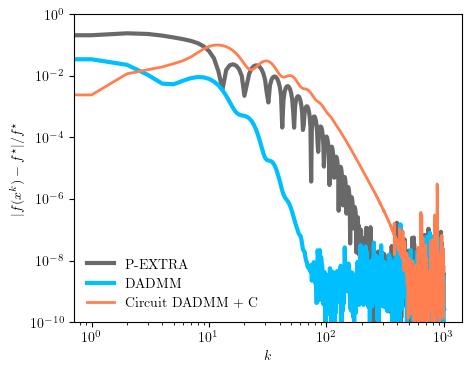

In [14]:
fname = "n6_circuit_dadmm_c"



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 4
plt.rcParams["legend.framealpha"] = 0.0
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["mathtext.fontset"] = 'cm' # default = 'dejavusans', other options = 'cm', 'stixsans', 'dejavuserif'
black, red, blue, green = 'dimgrey', 'coral', 'deepskyblue', 'gold'

# operator norm plot (log-log plot)
plt.figure(figsize=(5,4))
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")
plt.plot(pg_f_reldiff, label='P-EXTRA', color=black, linewidth=3)
plt.plot(admm_f_reldiff, label='DADMM', color=blue, linewidth=3)
# plt.plot(ciradmm_f_reldiff, label='Circuit DADMM',  color=green, linewidth=2)
plt.plot(dadmm_c_f_reldiff, label='Circuit DADMM + C',  color=red, linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$|f(x^k) - f^\star|/f^\star$")
# plt.ylabel(r"$\|\tilde{\mathbf{A}}x_k\|^2_M$")
plt.ylim(1e-10, 1e0)
plt.legend()
plt.savefig(f'plots/freldif_{fname}.pdf', dpi=300)

# plt.figure(figsize=(5,4))
# plt.minorticks_off()
# plt.xscale("log")
# plt.yscale("log")
# plt.plot(pg_err_opt_reldiff, label='P-EXTRA', color=black, linewidth=3)
# plt.plot(admm_err_opt_reldiff, label='DADMM', color=blue, linewidth=3)
# # plt.plot(admm_err_opt_reldiff, label='Circuit DADMM', color=green, linewidth=2)
# plt.plot(dadmm_c_err_opt_reldiff, label='Circuit DADMM + C', color=red, linewidth=2)
# plt.xlabel(r"$k$")
# plt.ylabel(r"$\|x_k - x^\star\|_F /\|x_0 - x^\star\|_F $")
# plt.ylim(1e-10, 1e0)
# plt.legend()
# plt.savefig(f'plots/xreldif_{fname}.pdf', dpi=300)